In [755]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# 1.Data Acquistion

In [756]:
#missing_values = ["n.a.", "NA", "n/a", "na", 0]
df=pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# 2.Data Inspection

In [757]:
#Displaying first few rows of the dataset
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [758]:
#Checking data types of each column
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

## Column Names and Descriptions:
The dataset has a total of 28 columns. Some of the important columns include:

DR_NO: Unique crime identifier

Date Rptd: Date the crime was reported

DATE OCC: Date of the crime occurrence

TIME OCC: Time of crime occurrence

AREA NAME: Name of the area where the crime occurred

Crm Cd Desc: Description of the crime

Vict Age: Age of the victim

Vict Sex: Gender of the victim

Vict Descent: Descent of the victim

LOCATION: Location of the crime

LAT & LON: Latitude and Longitude coordinates of the crime location

# 3.Data Cleaning

In [759]:
# Check for missing data
missing_data = df.isnull().sum()

# Filter out columns that have missing data
missing_data = missing_data[missing_data > 0]

missing_data

Mocodes           112762
Vict Sex          107192
Vict Descent      107200
Premis Cd              9
Premis Desc          480
Weapon Used Cd    531448
Weapon Desc       531448
Crm Cd 1              10
Crm Cd 2          755765
Crm Cd 3          813869
Crm Cd 4          815823
Cross Street      685361
dtype: int64

In [760]:
# Handle missing values

# Filling 'Unknown' for certain columns
columns_to_fill_unknown = ['Vict Sex','Vict Descent', 'Premis Desc']
for col in columns_to_fill_unknown:
    df[col].fillna('Unknown', inplace=True)
    
df['Vict Sex'].replace('Unknown', 'X', inplace=True)
df['Vict Sex'].replace('H', 'X', inplace=True)

# Filling 0 for certain columns
columns_to_fill_zero = ['Crm Cd 1', 'Premis Cd']
for col in columns_to_fill_zero:
    df[col].fillna(0, inplace=True)

# We'll leave columns like 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', and 'Cross Street' as they are for now.

# Check if there are any duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicated rows: ",duplicate_rows)

missing_data_after_cleaning = df.isnull().sum()
missing_data_after_cleaning = missing_data_after_cleaning[missing_data_after_cleaning > 0]

missing_data_after_cleaning

Number of duplicated rows:  0


Mocodes           112762
Weapon Used Cd    531448
Weapon Desc       531448
Crm Cd 2          755765
Crm Cd 3          813869
Crm Cd 4          815823
Cross Street      685361
dtype: int64

In [761]:
# Convert date columns to datetime format
df['Date Rptd']=pd.to_datetime(df['Date Rptd'])
df['DATE OCC']=pd.to_datetime(df['DATE OCC'])
df['Year']  = df['DATE OCC'].dt.year
df['Month Number'] = df['DATE OCC'].dt.month
df['Month']=df['Month Number'].map(lambda x: calendar.month_name[x])
df['Day']   = df['DATE OCC'].dt.day
df['Day Name']   = df['DATE OCC'].dt.day_name()
# Re-check the data types to confirm the changes
updated_data_types = df.dtypes

updated_data_types

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
Year                       int64
Month Number               int64
Month     

In [762]:
crime_data=df[df['Year']!=2023]

In [763]:
crime_data.reset_index(inplace=True)
crime_data.head()

,index,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month Number,Month,Day,Day Name
0,0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,...,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020,1,January,8,Wednesday
1,1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,...,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020,1,January,1,Wednesday
2,2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,...,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020,2,February,13,Thursday
3,3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,...,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020,1,January,1,Wednesday
4,4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,...,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020,1,January,1,Wednesday


# Exploratory Data Analysis

# 1. Overall Crime Trends:

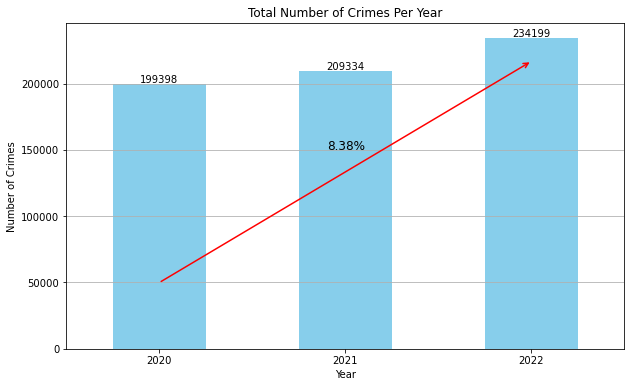

In [764]:
# Group by year and count the number of crimes
crime_by_year = crime_data['Year'].value_counts().sort_index()

# Define the starting and ending values
starting_value = crime_by_year.iloc[0]
ending_value = crime_by_year.iloc[-1]
number_of_years = len(crime_by_year) - 1  

# Calculate the CAGR
cagr = ((ending_value / starting_value) ** (1 / number_of_years)) - 1
cagr_val = f"{cagr:.2%}"

# Plot the crime trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y')
for i, v in enumerate(crime_by_year):
    plt.text(i, v, str(v), ha='center', va='bottom')

midpoint = (2, (crime_by_year.min() + crime_by_year.max()) / 2)
arrow_props = dict(arrowstyle='->', lw=1.5, color='red')
plt.annotate('', xy=midpoint, xytext=(0, 50000), arrowprops=arrow_props, fontsize=12)
plt.annotate(cagr_val, xy=midpoint, xytext=(0.9, 150000), fontsize=12)

plt.show()

The bar chart displays the total number of crimes per year. From the visualization:

- The year 2022 witnessed the highest number of reported crimes compared to subsequent years.
- The red line indicates the **CAGR (Compound Annual Growth Rate)** line.
- We can observe **8.38%** increase in the number of crimes across the years.

# 2. Seasonal Patterns:

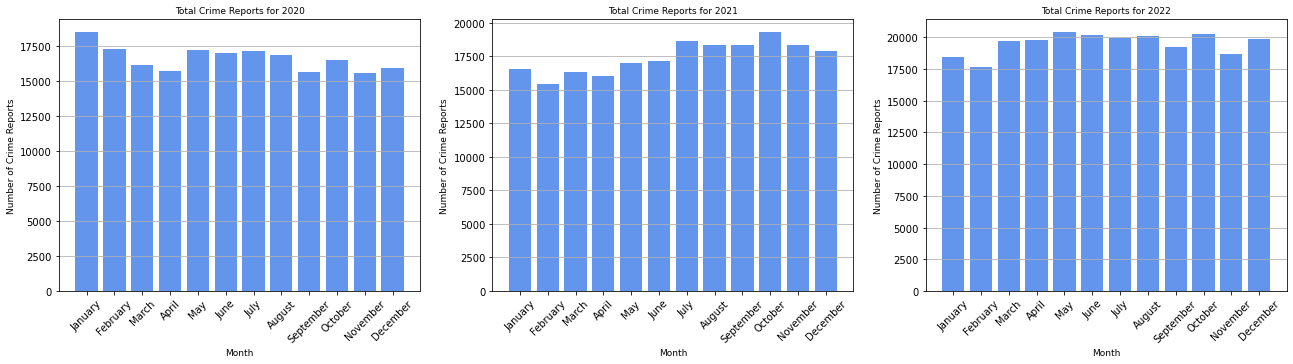

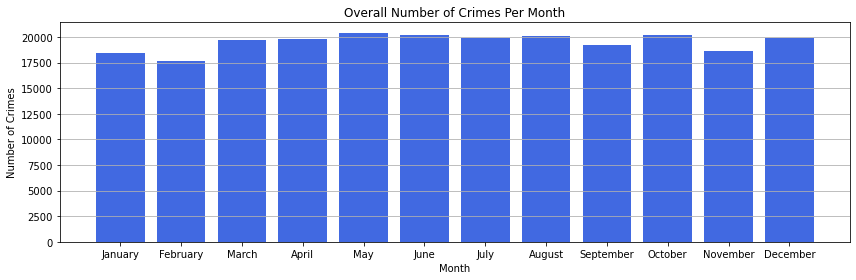

In [765]:
# Group by month and calculate the number of crimes per month over the years
month_order = ['January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 'September', 
               'October', 'November', 'December']
crime_data['Month']=pd.Categorical(crime_data['Month'], categories=month_order, ordered=True)
crime_by_year_month = crime_data.groupby(['Year', 'Month']).size().reset_index(name='Total Crime Reports')
crime_by_month = crime_data.groupby(['Month']).size().reset_index(name='Total Crime Reports')

# Plot the seasonal crime trends
plt.figure(figsize=(22, 5))

plt.subplot(1, 3, 1)
plt.bar(crime_by_year_month[crime_by_year_month['Year'] == 2020]['Month'], crime_by_year_month[crime_by_year_month['Year'] == 2020]['Total Crime Reports'], label='2020', color='cornflowerblue')
plt.xlabel('Month', fontsize=9)
plt.ylabel('Number of Crime Reports', fontsize=9)
plt.title(f'Total Crime Reports for 2020', fontsize= 9)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.subplot(1, 3, 2)
plt.bar(crime_by_year_month[crime_by_year_month['Year'] == 2021]['Month'], crime_by_year_month[crime_by_year_month['Year'] == 2021]['Total Crime Reports'], label='2021', color='cornflowerblue')
plt.xlabel('Month', fontsize=9)
plt.ylabel('Number of Crime Reports', fontsize=9)
plt.title(f'Total Crime Reports for 2021', fontsize= 9)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.subplot(1, 3, 3)
plt.bar(crime_by_year_month[crime_by_year_month['Year'] == 2022]['Month'], crime_by_year_month[crime_by_year_month['Year'] == 2022]['Total Crime Reports'], label='2022', color='cornflowerblue')
plt.xlabel('Month', fontsize=9)
plt.ylabel('Number of Crime Reports', fontsize=9)
plt.title(f'Total Crime Reports for 2022', fontsize= 9)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.figure(figsize=(12, 4))
plt.bar(crime_by_year_month['Month'], crime_by_year_month['Total Crime Reports'], color='royalblue')
plt.title('Overall Number of Crimes Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

The line chart visualizes the number of crimes reported each month for given years:
#### For 2020:
- The month of January seem to have higher reported crimes compared to other months.
- In contrast, September and November have relatively fewer reported crimes.

#### For 2021:
- The month of October seem to have higher reported crimes compared to other months.
- In contrast, February and April have relatively fewer reported crimes.

#### For 2022:
- The month of May seem to have higher reported crimes compared to other months.
- In contrast, January and February have relatively fewer reported crimes.

#### Overall Level:
- The month of May has the highest reported crimes compared to other months.
- In contrast, January and February have relatively fewer reported crimes.
- These observations provide insights into potential seasonal patterns, although the differences between months are not significantly large.

# 3. Most Common Crime Type:

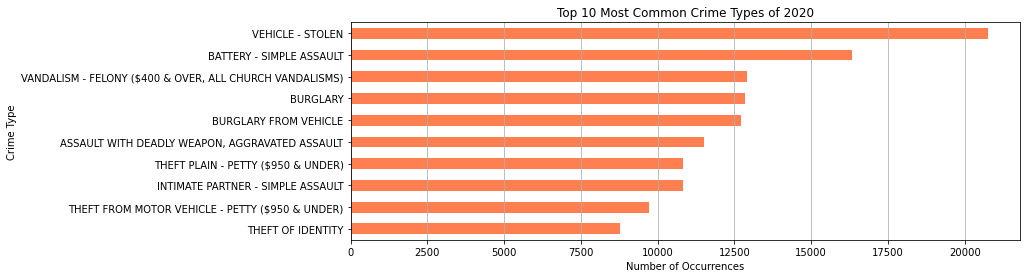

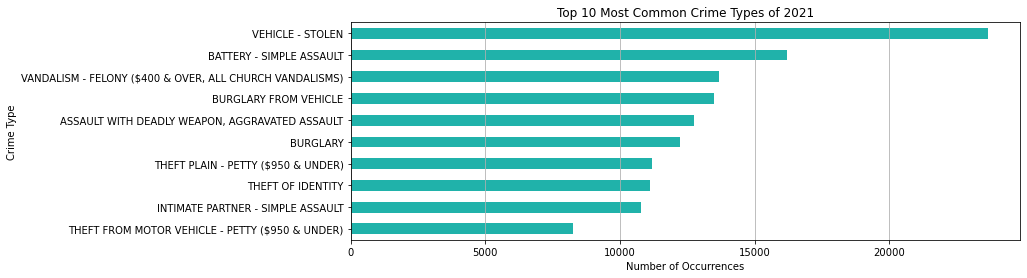

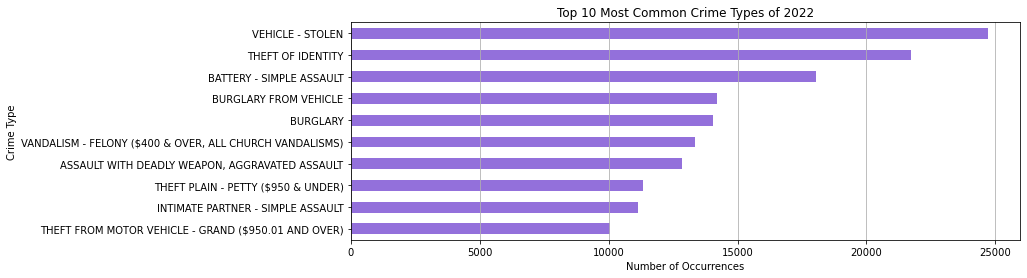

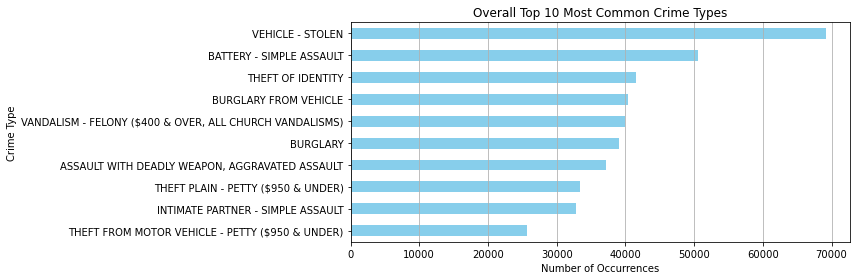

In [766]:
plt.figure(figsize=(12, 4))
crime_data[crime_data['Year']==2020]['Crm Cd Desc'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Most Common Crime Types of 2020')
plt.xlabel('Number of Occurrences')
plt.ylabel('Crime Type')
plt.gca().invert_yaxis()
plt.grid(axis='x')

plt.figure(figsize=(12, 4))
crime_data[crime_data['Year']==2021]['Crm Cd Desc'].value_counts().head(10).plot(kind='barh', color='lightseagreen')
plt.title('Top 10 Most Common Crime Types of 2021')
plt.xlabel('Number of Occurrences')
plt.ylabel('Crime Type')
plt.gca().invert_yaxis()
plt.grid(axis='x')

plt.figure(figsize=(12, 4))
crime_data[crime_data['Year']==2022]['Crm Cd Desc'].value_counts().head(10).plot(kind='barh', color='mediumpurple')
plt.title('Top 10 Most Common Crime Types of 2022')
plt.xlabel('Number of Occurrences')
plt.ylabel('Crime Type')
plt.gca().invert_yaxis()
plt.grid(axis='x')

plt.figure(figsize=(12, 4))
crime_data['Crm Cd Desc'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Overall Top 10 Most Common Crime Types')
plt.xlabel('Number of Occurrences')
plt.ylabel('Crime Type')
plt.gca().invert_yaxis()
plt.grid(axis='x')

plt.tight_layout()
plt.show()


The bar chart displays the top 10 most common crime types reported.

**VEHICLE-STOLEN** and **BATTERY - SIMPLE ASSAULT** have always been the top 2 highest crime types across all the years but in the year 2022 the 2nd highest reported crime type was **THEFT OF IDENTITY**

We can observe that **THEFT OF IDENTITY** has rapidly shot up to 2nd position in the year 2022 from 2020.

The most frequent crime type is **VEHICLE - STOLEN** with 46,541 occurrences, making it the predominant crime in the dataset.

# 4. Regional Differences:

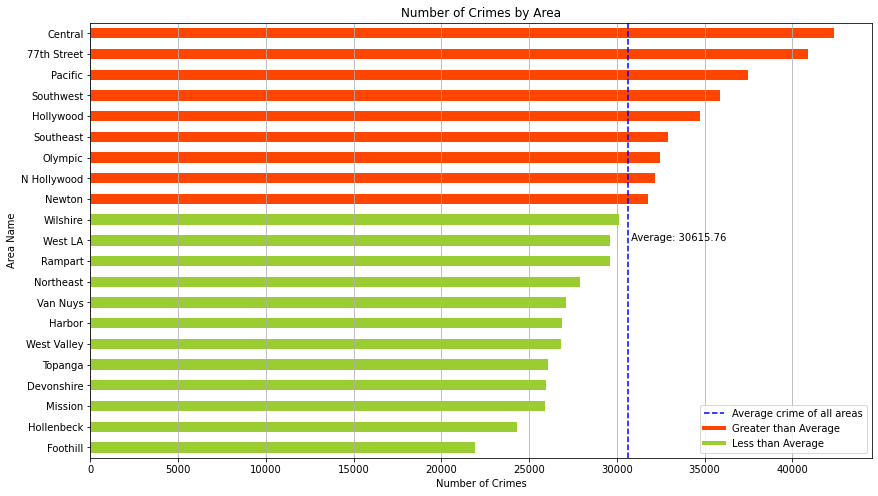

In [767]:
# Group by area and count the number of crimes
crime_by_area = crime_data['AREA NAME'].value_counts()
average_crime_per_area = crime_by_area.mean()

# Plot the crime rates by area
plt.figure(figsize=(14, 8))
# Set legend labels explicitly for different bar colors
colors = ['orangered' if value > average_crime_per_area else 'yellowgreen' for value in crime_by_area]

# Create a custom legend
custom_legend = [
    plt.Line2D([0], [0], color='blue', linestyle='--', label='Average crime of all areas'),
    plt.Line2D([0], [0], color='orangered', lw=4, label='Greater than Average'),
    plt.Line2D([0], [0], color='yellowgreen', lw=4, label='Less than Average'),
]

crime_by_area.plot(kind='barh', color=colors)
plt.axvline(average_crime_per_area, color='blue', linestyle='--', label='Average Crime Rate')
plt.text(average_crime_per_area, 10, f' Average: {average_crime_per_area:.2f}')
plt.title('Number of Crimes by Area')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.gca().invert_yaxis()  # Inverting y-axis for better readability
plt.grid(axis='x')
plt.legend(handles=custom_legend, loc='lower right')
plt.show()

The bar chart presents the number of crimes by area:

- Areas such as **77th Street** and **Central** have a higher number of reported crimes compared to other areas.
- **Central** area has the highest number of crimes.
- **Foothill** area has recorded the least number of crimes.
- In contrast, areas like **Hollenbeck** and **Foothill** report fewer crimes.
- This visualization provides insights into regional differences in crime rates, highlighting areas with more frequent criminal activity.

# 6. Day of the Week Analysis:

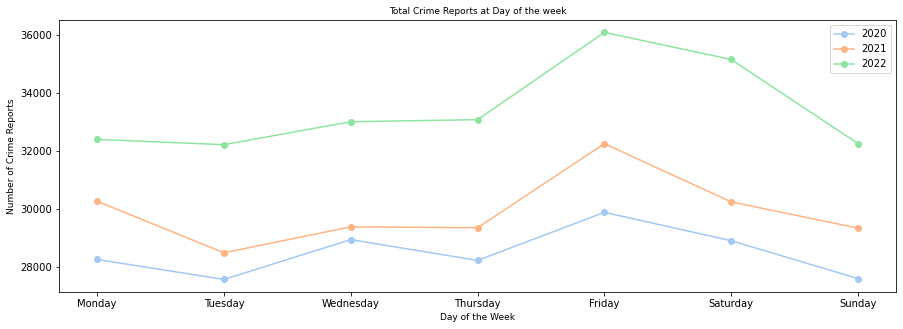

In [768]:
# Group by Day and calculate the number of crimes per day over the years
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_data['Day Name']=pd.Categorical(crime_data['Day Name'], categories=day_order, ordered=True)
crime_by_year_day = crime_data.groupby(['Year', 'Day Name']).size().reset_index(name='Total Crime Reports')
crime_by_day = crime_data.groupby(['Day Name']).size().reset_index(name='Total Crime Reports')


plt.figure(figsize=(15, 5))
plt.plot(crime_by_year_day[crime_by_year_day['Year']==2020]['Day Name'], crime_by_year_day[crime_by_year_day['Year']==2020]['Total Crime Reports'], marker='o', label='2020')
plt.plot(crime_by_year_day[crime_by_year_day['Year']==2021]['Day Name'], crime_by_year_day[crime_by_year_day['Year']==2021]['Total Crime Reports'], marker='o', label='2021')
plt.plot(crime_by_year_day[crime_by_year_day['Year']==2022]['Day Name'], crime_by_year_day[crime_by_year_day['Year']==2022]['Total Crime Reports'], marker='o', label='2022')
plt.xlabel('Day of the Week', fontsize=9)
plt.ylabel('Number of Crime Reports', fontsize=9)
plt.title('Total Crime Reports at Day of the week', fontsize= 9)
plt.legend()
plt.show()

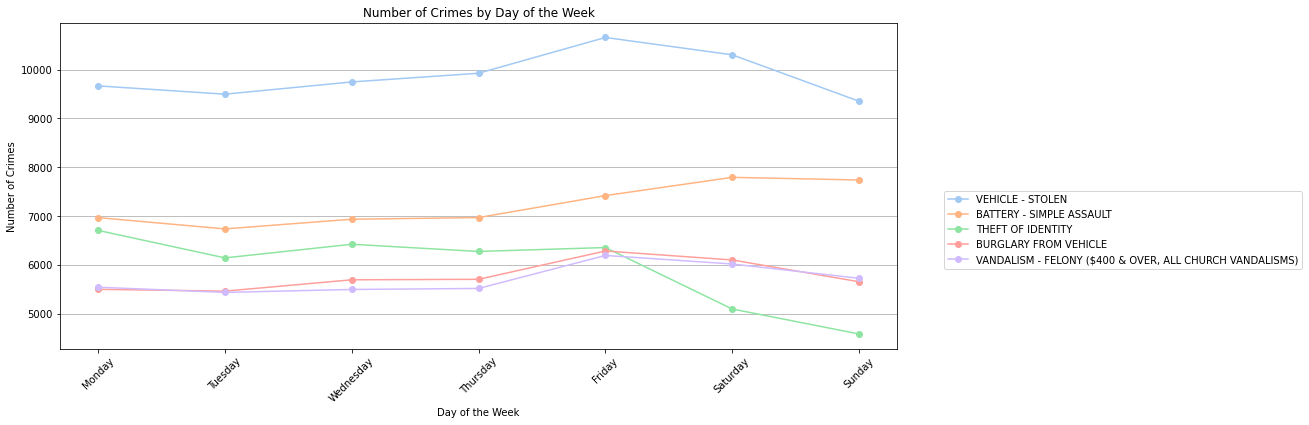

In [769]:
crime_by_type_day = crime_data.groupby(['Day Name', 'Crm Cd Desc']).size().reset_index(name='Total Crime Reports')
plt.figure(figsize=(15, 6))
for crime in list(crime_data['Crm Cd Desc'].value_counts().head(5).reset_index(name='Number of Crimes')['index']):
    plt.plot(crime_by_type_day[crime_by_type_day['Crm Cd Desc']==crime]['Day Name'], crime_by_type_day[crime_by_type_day['Crm Cd Desc']==crime]['Total Crime Reports'], marker='o', label=crime)

plt.title('Number of Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 0.5))

plt.show()

# 7. Impact of Major Events:

For this analysis, we will be considering Covid-19 and US Presidential Elections.

1. **COVID-19 Pandemic:** Lockdowns and restrictions began around March 2020 and ended in August 2020 in many parts of the US.

2. **US Presidential Election:** The election took place on November 3, 2020.

- Pre-pandemic Period: We can analyze crime rates from January 2020 to February 2020.
- Pandemic Onset Period: We can analyze crime rates from March 2020 to December 2020.
- Post-pandemic Period: We can analyze crime rates from January 2021 onwards (though it's worth noting that as of my last update in January 2022, the pandemic is ongoing with varying impacts).

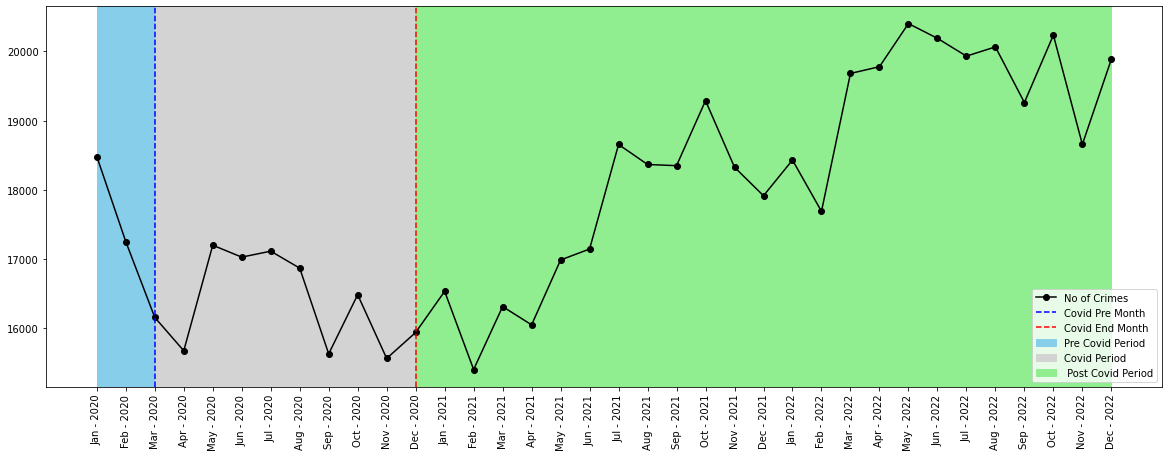

In [770]:
# Group data by month and count the number of crimes
crime_by_year_month['Month-Year'] = crime_by_year_month['Month'].str.slice(0, 3) +' - '+crime_by_year_month['Year'].astype(str)

# Plotting the overall crime trends with highlighted events
plt.figure(figsize=(20, 7))
plt.plot(crime_by_year_month['Month-Year'], crime_by_year_month['Total Crime Reports'], label='No of Crimes', marker='o', color='black')
plt.axvline('Mar - 2020', color='b', linestyle='--', label='Covid Pre Month')
plt.axvspan('Jan - 2020','Mar - 2020',color='skyblue', label='Pre Covid Period')
plt.axvline('Dec - 2020', color='r', linestyle='--', label='Covid End Month')
plt.axvspan('Mar - 2020','Dec - 2020',color='lightgray',label='Covid Period')
plt.axvspan('Dec - 2020','Dec - 2022',color='lightgreen',label=' Post Covid Period')
plt.xticks(rotation=90)

plt.legend()
plt.show()

- **Before COVID (Jan 2020 - Mar 2020)**: Crime rates were relatively stable.

- **COVID-19 Impact (Mar 2020 - Dec 2020)**: When the pandemic started, there was a big drop in reported crimes. This is because of lockdowns and restrictions that kept people at home.

- **After COVID (Dec 2020 - Dec 2022)**: Crime reports gradually increased as restrictions eased and life returned to normal.

- **Special Months**: The blue and red lines mark important points in time - one just before the pandemic and the other when it was considered over.

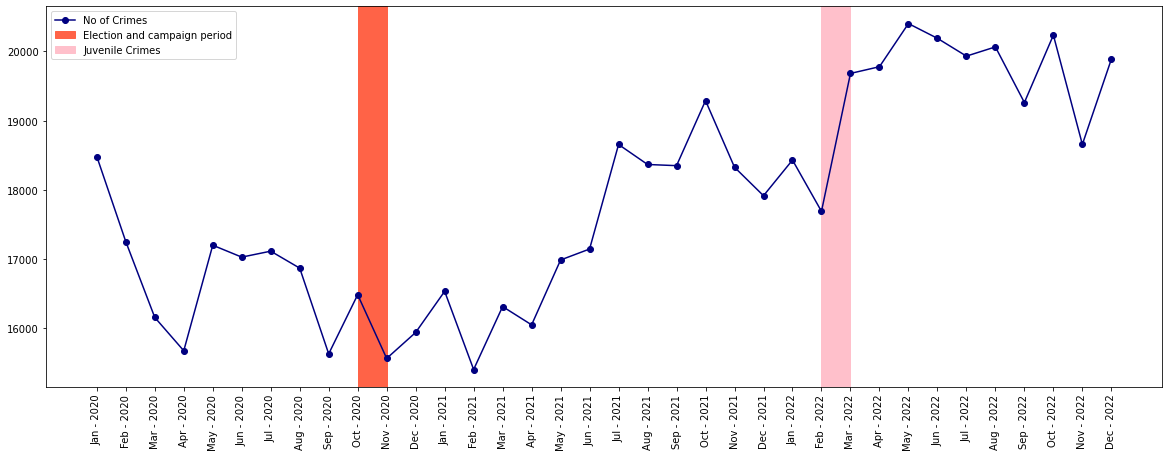

In [771]:
# Group data by month and count the number of crimes
crime_by_year_month['Month-Year'] = crime_by_year_month['Month'].str.slice(0, 3) +' - '+crime_by_year_month['Year'].astype(str)

# Plotting the overall crime trends with highlighted events
plt.figure(figsize=(20, 7))
plt.plot(crime_by_year_month['Month-Year'], crime_by_year_month['Total Crime Reports'], label='No of Crimes', marker='o', color='navy')
plt.axvspan('Oct - 2020','Nov - 2020',color='tomato', label='Election and campaign period')
plt.axvspan('Feb - 2022','Mar - 2022',color='pink',label='Juvenile Crimes')
plt.xticks(rotation=90)

plt.legend()
plt.show()

- The plot displays the number of crimes each month, marked as navy blue circles.

- It highlights two specific periods: an "Election and campaign period" in late 2020 (in tomato color) and a period of "Juvenile Crimes" in early 2022 (in pink color).

# 8. Outliers and Anomalies:

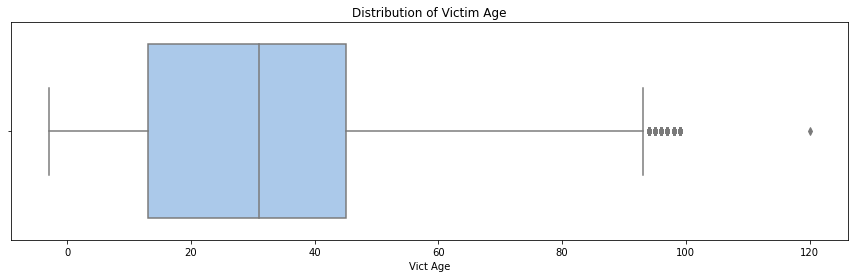

In [772]:
# Visualize the distribution of "Vict Age" to identify potential outliers
plt.figure(figsize=(15, 4))
sns.boxplot(crime_data['Vict Age'])
plt.title('Distribution of Victim Age')
plt.show()

The boxplot visualizes the distribution of the "Vict Age" column. We can observe a few potential outliers, specifically some age values that seem unrealistically high or low.

For the purpose of this analysis, let's consider ages below 0 as outliers and handle them. One approach would be to replace such values with the median age.

In [773]:
crime_data[crime_data['Vict Age']<0]['Vict Age'].value_counts()

-1    55
-2    13
-3     1
Name: Vict Age, dtype: int64

The age column in given dataset is having values less than 0 which is not possible. So we will impute the values less than 0 in Age column with median.

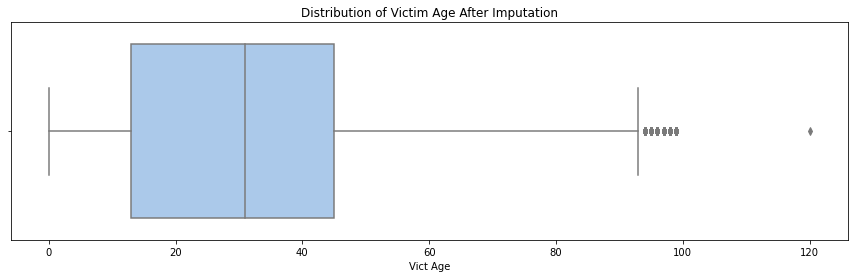

In [774]:
# Handling 0 values in Age Column with data Imputation before we create the Age Group column
# Calculate the median age
median_age = crime_data[crime_data['Vict Age'] > 0]['Vict Age'].median()

# Replace outlier age values with the median age
crime_data.loc[crime_data['Vict Age']<0, 'Vict Age'] =crime_data[crime_data['Vict Age'] > 0]['Vict Age'].median()
crime_data['Vict Age'] = crime_data['Vict Age'].astype(int)

crime_data[crime_data['Vict Age']<0]['Vict Age'].value_counts()

# Re-visualize the distribution of "Vict Age" after handling outliers
plt.figure(figsize=(15,4))
sns.boxplot(crime_data['Vict Age'])
plt.title('Distribution of Victim Age After Imputation')
plt.show()

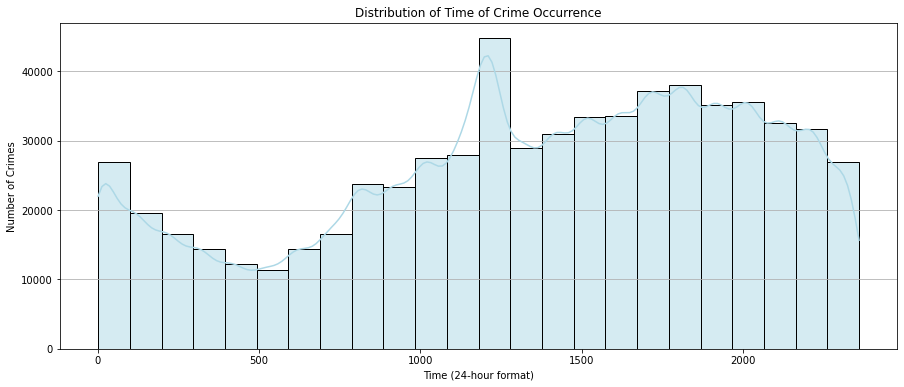

In [775]:
# Visualize the distribution of "TIME OCC" to identify potential anomalies
plt.figure(figsize=(15, 6))
sns.histplot(crime_data['TIME OCC'], bins=24, kde=True, color='lightblue')
plt.title('Distribution of Time of Crime Occurrence')
plt.xlabel('Time (24-hour format)')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')

plt.show()

The histogram showcases the distribution of crime occurrences throughout the day:

- There seems to be a noticeable dip in crimes during the early morning hours, specifically around 5-6 AM.
- Crime occurrences start to increase from mid-morning and peak during the afternoon and early evening hours.
- Late evening and nighttime (around 12 AM) also witness a significant number of crimes.
- This distribution is fairly expected, as certain times of the day, like early mornings, are typically quieter with fewer people outdoors, potentially leading to fewer reported crimes.

# 9. Demographic Factors:

In [776]:
crime_data['Vict Sex'].value_counts()

M    268151
F    238365
X    136415
Name: Vict Sex, dtype: int64

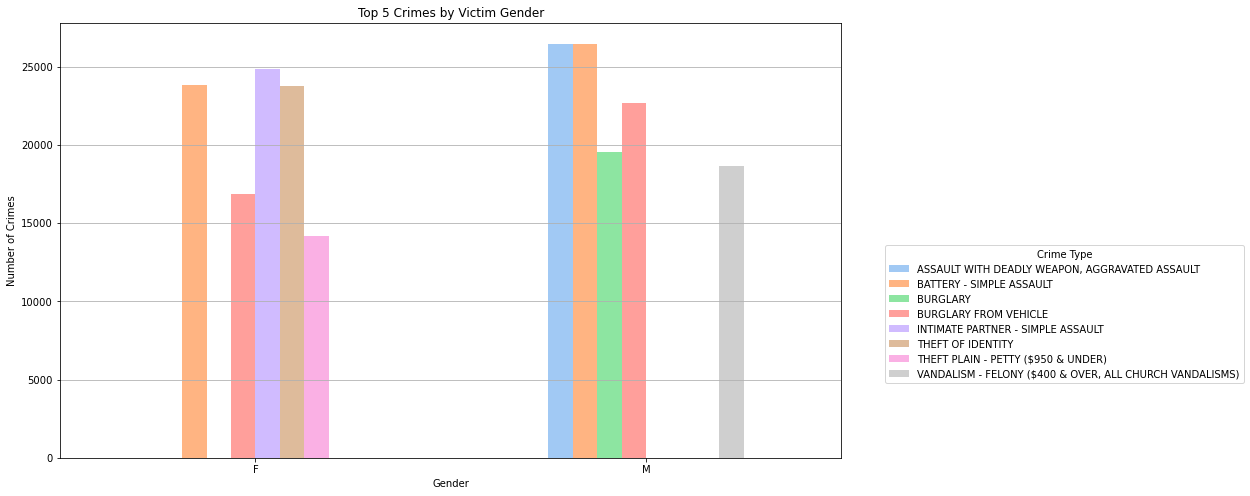

In [777]:
# Filter out "Unknown" gender values
filtered_data = crime_data[~crime_data['Vict Sex'].isin(['X'])]

# Group by victim's gender and crime type, then get the top crimes for each gender
top_crimes_by_gender = filtered_data.groupby('Vict Sex')['Crm Cd Desc'].value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

# Plot the top crimes for each gender
top_crimes_by_gender.unstack().plot(kind='bar', figsize=(14, 8))
plt.title('Top 5 Crimes by Victim Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 0.5))

plt.show()

The bar chart presents the top 5 crimes experienced by victims of different genders:

- **ASSAULT WITH DEADLY WEAPON, AGGREVATED ASSAULT** is the highest frequency Crime Type which Male victims faced.
- **IMTIMATE PARTNER - SIMPLE ASSAULT** is the highest frequency Crime Type which Female victims faced.
- **BATTERY - SIMPLE ASSAULT** is common among both genders.
- There are some differences in the ranking of these top crimes between genders, but the overall types of crimes experienced are relatively similar.

In [778]:
daily_crimes = crime_data.groupby(crime_data['DATE OCC'].dt.date).size().reset_index()
daily_crimes.columns = ['ds', 'y']

In [779]:
from statsmodels.tsa.stattools import adfuller

# Aggregate crime data on a daily basis
daily_crimes = crime_data.groupby(crime_data['DATE OCC'].dt.date).size().reset_index()
daily_crimes.columns = ['ds', 'y']
daily_crimes['ds']= pd.to_datetime(daily_crimes['ds'])

# Split the data into training and validation sets (keeping the last 60 days for validation)
train = daily_crimes[:-90]
valid = daily_crimes[-90:]


# Augmented Dickey-Fuller test
#adfuller(train['y'])
result = adfuller(train['y'])
adf_statistic, p_value = result[0], result[1]



adf_statistic, p_value

(-2.9659208936460137, 0.03820186145989029)

The negative value of the ADF statistic is less than the critical values, and the p-value is less than 0.05. This indicates that the time series is stationary and doesn't have a unit root, meaning we can proceed with ARIMA modeling without needing to difference the series.

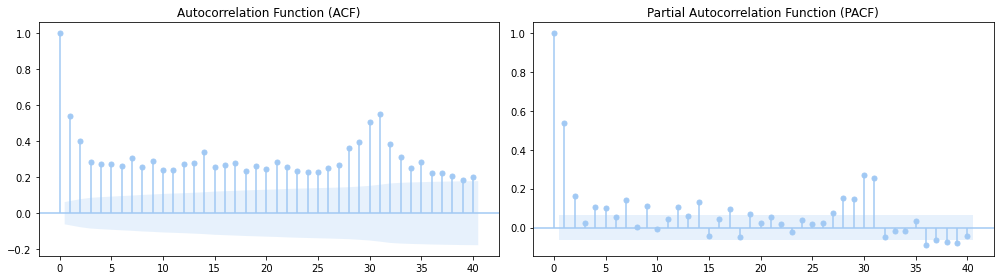

In [780]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# ACF plot
plot_acf(train['y'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(train['y'], lags=40, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots provide insights into the order of the ARIMA model:

The ACF plot shows a gradual decline, suggesting a moving average (MA) component in the data.
The PACF plot shows a sharp drop after the thirty lag, suggesting that the autoregressive (AR) component is of order 30.
Based on these observations, we can start with an initial ARIMA model with parameters p=30, d=0 (since the series is already stationary), and q=30.

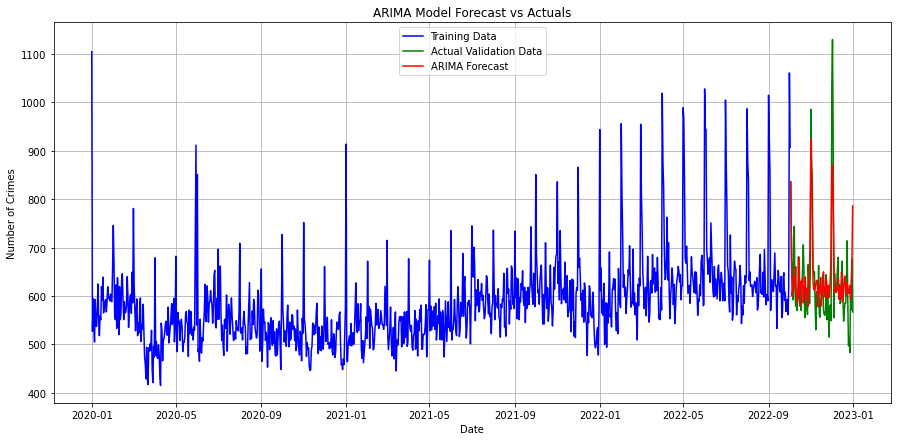

MSE = 5034.668202624119


In [781]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit the ARIMA model
arima_model = ARIMA(train['y'], order=(30,0,30))
arima_result = arima_model.fit()

# Forecast the next 90 days
forecast_arima = arima_result.forecast(steps=90)

# Calculate the Mean Squared Error (MSE) on the validation set
mse_arima = mean_squared_error(valid['y'], forecast_arima)

# Plot the actual vs forecasted values
plt.figure(figsize=(15, 7))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(valid['ds'], valid['y'], label='Actual Validation Data', color='green')
plt.plot(valid['ds'], forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.show()

print("MSE =", mse_arima)

- The code fits an ARIMA model with a complex order of (30, 0, 30) to a time series dataset of crimes.

- It forecasts the next 90 days of crime data and calculates the Mean Squared Error (MSE) on the validation set, resulting in an MSE of approximately 5034.67.

- The code generates a plot that shows the training data in blue, the actual validation data in green, and the ARIMA model's forecast in red.

In [782]:
from sklearn.metrics import r2_score

r2 = r2_score(valid['y'], forecast_arima)
print(f'r2 score = {r2*100:.2f}%')

r2 score = 55.73%


R-squared (R2) score of 55.73% means that the ARIMA model can explain or predict about 55.73% of the differences or changes that appear in the 'y' variable. So, it's doing a decent job.

The line chart showcases the ARIMA model's forecast against the actual validation data:

- The blue line represents the training data.
- The green line shows the actual validation data.
- The dashed red line is the ARIMA model's forecast.
